In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("E:/project/osteoporosis.csv")

In [5]:
data.shape

(1958, 16)

In [6]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  1958 non-null   object
 12  Medical Conditions   1958 non-null   object
 13  Medications          1958 non-null   object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [9]:
data["Age"].value_counts()

18    152
19    147
34    121
29    118
21    117
     ... 
88      9
60      8
28      8
58      7
48      6
Name: Age, Length: 73, dtype: int64

In [10]:
data.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [11]:
data.groupby('Osteoporosis').agg({'Age':np.mean})

,Age
Osteoporosis,
0,24.343207
1,53.859040


In [12]:
data.groupby('Osteoporosis').count().Gender

Osteoporosis
0    979
1    979
Name: Gender, dtype: int64

In [13]:
data.describe()  

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns

c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

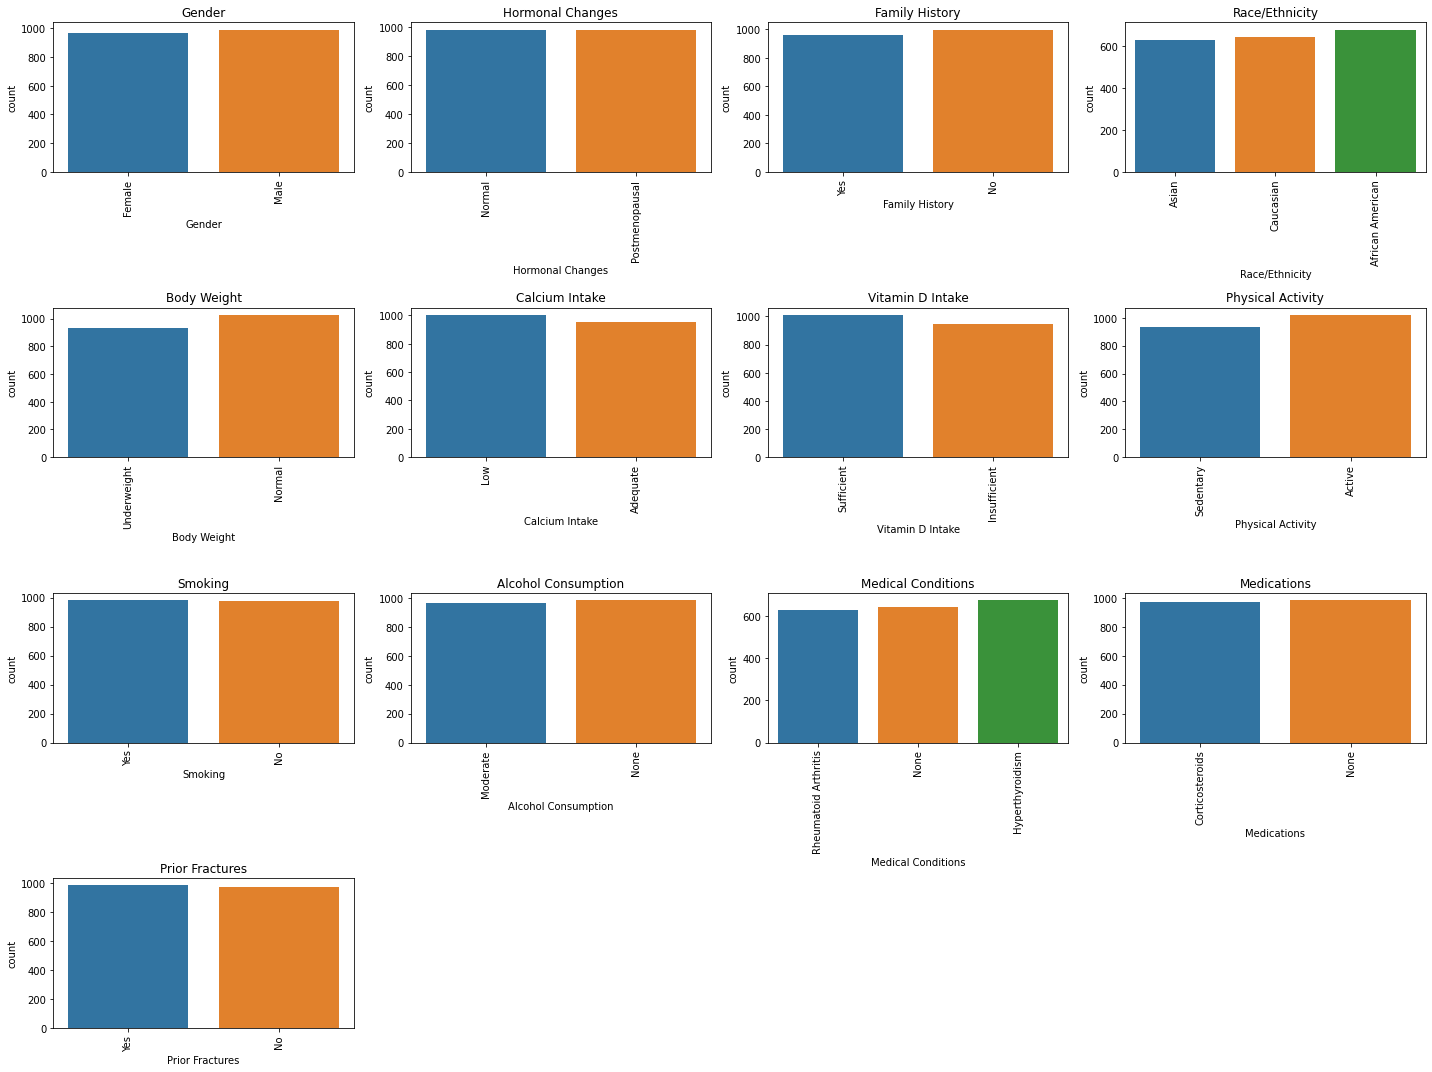

In [15]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data[column])
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [18]:
missing_data = data.isnull().sum()

In [19]:
scaler = StandardScaler()
data[['Age']] = scaler.fit_transform(data[['Age']])

In [20]:
data.head(), missing_data

(       Id       Age  Gender  Hormonal Changes  Family History  Race/Ethnicity  \
 0  104866  1.400418       0                 0               1               1   
 1  101999 -0.332606       0                 0               1               1   
 2  106567  2.337187       0                 1               0               2   
 3  102316  1.821964       0                 0               0               2   
 4  101944 -0.051575       1                 1               1               0   
 
    Body Weight  Calcium Intake  Vitamin D Intake  Physical Activity  Smoking  \
 0            1               1                 1                  1        1   
 1            1               1                 1                  1        0   
 2            0               0                 1                  0        0   
 3            1               0                 0                  1        1   
 4            0               1                 1                  0        1   
 
    Alcohol Consum

In [21]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['Osteoporosis'])
y = data['Osteoporosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1566, 15), (392, 15), (1566,), (392,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

accuracy_logreg, report_logreg, conf_matrix_logreg


c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Faravardeh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

(0.4923469387755102,
 '              precision    recall  f1-score   support\n\n           0       0.49      1.00      0.66       193\n           1       0.00      0.00      0.00       199\n\n    accuracy                           0.49       392\n   macro avg       0.25      0.50      0.33       392\nweighted avg       0.24      0.49      0.32       392\n',
 array([[193,   0],
        [199,   0]], dtype=int64))

In [23]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, report_rf, conf_matrix_rf


(0.8367346938775511,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.95      0.85       193\n           1       0.94      0.73      0.82       199\n\n    accuracy                           0.84       392\n   macro avg       0.85      0.84      0.84       392\nweighted avg       0.86      0.84      0.83       392\n',
 array([[183,  10],
        [ 54, 145]], dtype=int64))

In [24]:
from sklearn.svm import SVC



svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

accuracy_svm, report_svm, conf_matrix_svm


(0.7295918367346939,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.62      0.69       193\n           1       0.69      0.84      0.76       199\n\n    accuracy                           0.73       392\n   macro avg       0.74      0.73      0.73       392\nweighted avg       0.74      0.73      0.73       392\n',
 array([[119,  74],
        [ 32, 167]], dtype=int64))

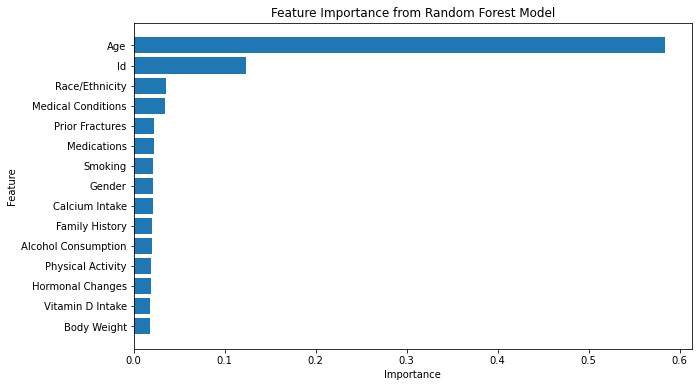

,Feature,Importance
1,Age,0.584165
0,Id,0.122997
5,Race/Ethnicity,0.035647
12,Medical Conditions,0.034749
14,Prior Fractures,0.022514
13,Medications,0.022086
10,Smoking,0.021666
2,Gender,0.021330
7,Calcium Intake,0.020830
4,Family History,0.020284


In [25]:

feature_importances = rf.feature_importances_


feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

feature_importances_df


In [26]:
from sklearn.model_selection import cross_val_score

cv = 10

cross_val_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')


mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

mean_score, std_score, cross_val_scores


(0.8559942438513868,
 0.019210448046485515,
 array([0.82142857, 0.85714286, 0.86734694, 0.85714286, 0.84693878,
        0.86734694, 0.87244898, 0.82142857, 0.87692308, 0.87179487]))

                           Id       Age    Gender  Hormonal Changes  \
Id                   1.000000 -0.036526 -0.011615          0.012090   
Age                 -0.036526  1.000000  0.015105          0.005464   
Gender              -0.011615  0.015105  1.000000         -0.018361   
Hormonal Changes     0.012090  0.005464 -0.018361          1.000000   
Family History      -0.019359 -0.016848  0.019671          0.020393   
Race/Ethnicity       0.019329 -0.029398  0.015803         -0.034173   
Body Weight         -0.014316  0.017046  0.010880         -0.007259   
Calcium Intake      -0.012766  0.002128 -0.009536         -0.016296   
Vitamin D Intake     0.017375  0.019184  0.022052         -0.000955   
Physical Activity    0.030384  0.020651  0.027155         -0.019513   
Smoking             -0.022140  0.027591 -0.039881         -0.006122   
Alcohol Consumption  0.020613 -0.004541  0.015202          0.006148   
Medical Conditions  -0.004901  0.004140  0.025976         -0.023160   
Medica

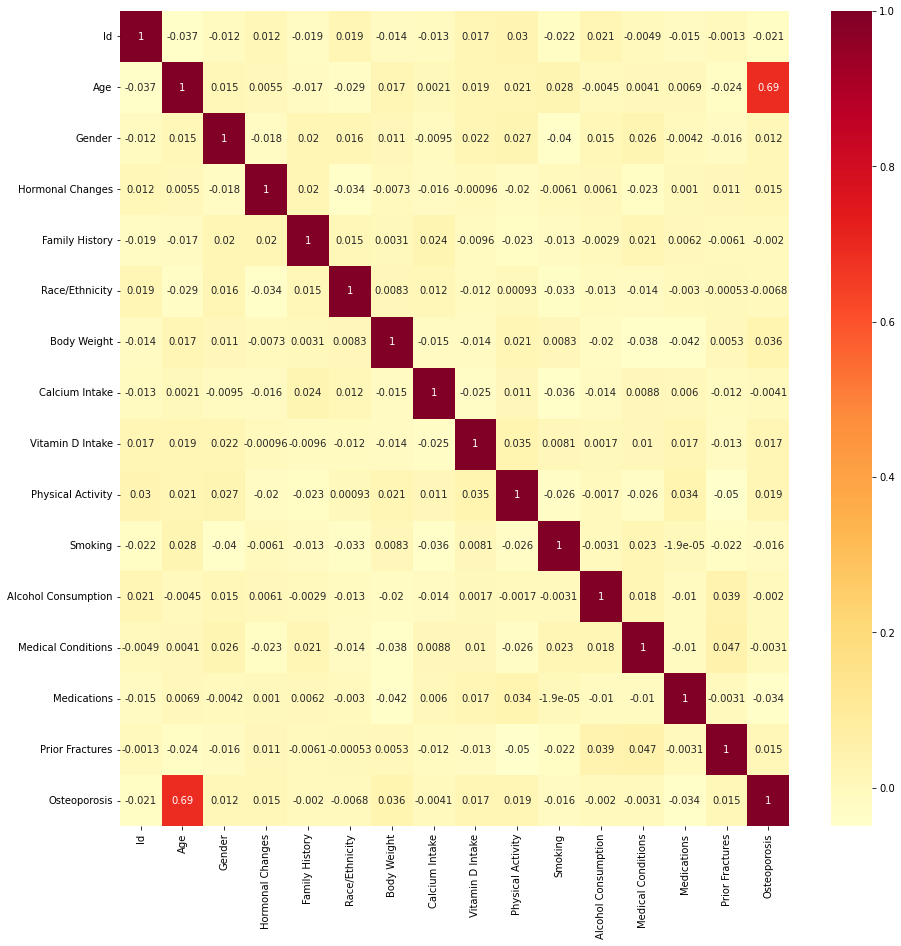

In [27]:
print(data.corr())
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='YlOrRd', annot=True)
plt
plt.show()